In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt



В таблице находятся данные о покупках.

Колонки: 
* client_id 
* birth_dt - дата рождения пользователя
* reg_dtm - дата и время регистрации пользователя
* purchase_id
* purchase_dt - дата покупки
* purchase_amt - стоимость покупки


NaN в purchase_id, purchase_dt, purchase_amt говорит о том, что покупка еще не была совершена пользователем

**Задача**

Сравнить активность пользователей по возрастным группам

In [2]:
def timedelta_to_years(delta: datetime.timedelta):
        seconds_in_year = 365.25*24*60*60
        return int(delta.total_seconds() / seconds_in_year)

In [3]:
df = pd.read_excel('1.xls', converters={'purchase_id':int})

In [4]:
df.head()

,client_id,birth_dt,reg_dttm,purchase_id,purchase_dt,purchase_amt
0,820519,1990-05-10,2019-01-02 12:49:39,NaN,NaT,NaN
1,820521,1970-03-23,2019-01-02 14:14:39,NaN,NaT,NaN
2,820523,1991-04-01,2019-01-02 19:51:19,1204926325,2019-02-12,500.0
3,820526,1985-04-27,2019-01-02 18:09:39,NaN,NaT,NaN
4,820544,1991-05-03,2019-01-03 12:24:42,NaN,NaT,NaN


In [5]:
df

,client_id,birth_dt,reg_dttm,purchase_id,purchase_dt,purchase_amt
0,820519,1990-05-10,2019-01-02 12:49:39,NaN,NaT,NaN
1,820521,1970-03-23,2019-01-02 14:14:39,NaN,NaT,NaN
2,820523,1991-04-01,2019-01-02 19:51:19,1204926325,2019-02-12,500.0
3,820526,1985-04-27,2019-01-02 18:09:39,NaN,NaT,NaN
4,820544,1991-05-03,2019-01-03 12:24:42,NaN,NaT,NaN
...,...,...,...,...,...,...
2372,835630,1991-01-05,2019-04-05 11:00:17,NaN,NaT,NaN
2373,835634,1991-09-06,2019-04-05 12:19:05,1299278852,2019-04-07,4000.0
2374,835650,1993-09-02,2019-04-05 12:26:39,1299387332,2019-04-08,1500.0
2375,835666,1998-05-15,2019-04-05 13:16:37,NaN,NaT,NaN


In [6]:
def get_group(age):
    if age <= 25:
        return 1
    if age > 25 and age < 45:
        return 2
    return 3   

df['age'] = (df.reg_dttm - df.birth_dt).apply(timedelta_to_years)
df["age_category"] = df.age.apply(get_group)
dfdays = df[["reg_dttm", "age", "age_category"]].copy()
dfdays["date"] = dfdays.reg_dttm.dt.date


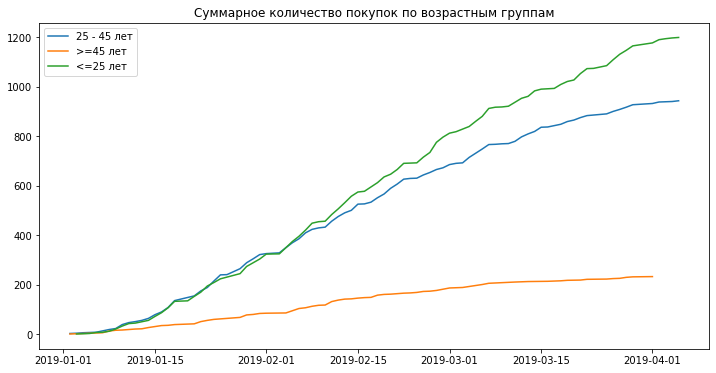

In [7]:
fig, ax = plt.subplots(figsize=(12,6))
for group_no in dfdays.age_category.unique():
    age_group = dfdays[dfdays.age_category==group_no].groupby("date").age_category.count().cumsum()
    plt.plot(age_group)
ax.legend(["25 - 45 лет",">=45 лет","<=25 лет"])
ax.set_title("Суммарное количество покупок по возрастным группам")
plt.show()

**Вывод**: 

* Возрастная группа "Старше 45 лет" наименее активная.
* Колличество покупок в день постоянно для каждой категории.

# 1

**Задача**:

Выяснить, есть ли зависимость между скоростью утилизации и размером первой покупки

In [8]:
purchased = df[df.purchase_id.notnull()]
purchased["reg_dt"] = purchased.reg_dttm.dt.date.astype("datetime64")
first_purchase = purchased.loc[purchased.groupby("client_id").purchase_dt.idxmin()]


C:\Users\spish\AppData\Local\Temp\ipykernel_17924\2069342349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchased["reg_dt"] = purchased.reg_dttm.dt.date.astype("datetime64")


In [9]:
first_purchase

,client_id,birth_dt,reg_dttm,purchase_id,purchase_dt,purchase_amt,age,age_category,reg_dt
2,820523,1991-04-01,2019-01-02 19:51:19,1204926325,2019-02-12,500.0,27,2,2019-01-02
6,820561,1993-10-22,2019-01-04 14:39:43,1205778332,2019-02-13,500.0,25,1,2019-01-04
12,820607,1970-09-27,2019-01-05 07:54:45,1223151881,2019-02-21,5000.0,48,3,2019-01-05
14,820628,2000-09-08,2019-01-06 12:54:53,1231401747,2019-02-27,500.0,18,1,2019-01-06
16,820635,1982-02-11,2019-01-06 01:19:46,1221670218,2019-02-20,6000.0,36,2,2019-01-06
...,...,...,...,...,...,...,...,...,...
2366,835253,2000-01-12,2019-04-03 09:07:49,1290067689,2019-04-03,500.0,19,1,2019-04-03
2368,835470,1998-07-24,2019-04-04 16:10:45,1296848740,2019-04-05,3500.0,20,1,2019-04-04
2371,835526,1989-12-25,2019-04-04 18:39:24,1294306433,2019-04-04,3500.0,29,2,2019-04-04
2373,835634,1991-09-06,2019-04-05 12:19:05,1299278852,2019-04-07,4000.0,27,2,2019-04-05


In [10]:
utilization = pd.DataFrame(index = first_purchase.index)
utilization["client_id"] = first_purchase.client_id
utilization["util_rapidity"] = first_purchase.purchase_dt - first_purchase.reg_dt
utilization["fst_purch_amt"] = first_purchase.purchase_amt
utilization

,client_id,util_rapidity,fst_purch_amt
2,820523,41 days,500.0
6,820561,40 days,500.0
12,820607,47 days,5000.0
14,820628,52 days,500.0
16,820635,45 days,6000.0
...,...,...,...
2366,835253,0 days,500.0
2368,835470,1 days,3500.0
2371,835526,0 days,3500.0
2373,835634,2 days,4000.0


In [11]:
mean_purch_amt_by_util_rapidity = utilization.groupby("util_rapidity").fst_purch_amt.mean()

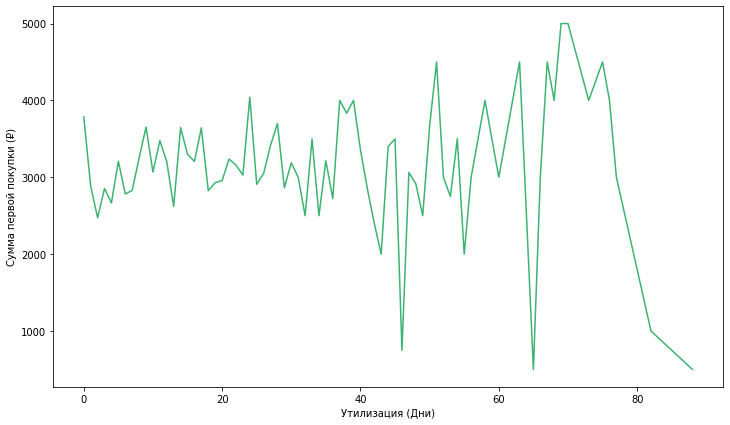

In [12]:
fig, ax = plt.subplots(figsize=(12,7))
res = mean_purch_amt_by_util_rapidity
ax.plot(res.index.days, res, color = "mediumseagreen")
ax.set_xlabel("Утилизация (Дни)")
ax.set_ylabel("Сумма первой покупки (₽)")
plt.show()

**Вывод**

График выглядит как график шума.

Зависимость между скоростью утилизации и размером первой покупки отсутствует.

# 2

**Задача**

Выяснить конверсию в покупку для каждой возрастной группы.

In [13]:
client_made_purchase = df.groupby("client_id").purchase_id.count() > 0
client_age_group = df[["client_id", "age_category"]].drop_duplicates()
client_info = pd.concat([client_age_group.set_index("client_id"), client_made_purchase], axis=1)

purchased_client_cnt = client_info.groupby("age_category").sum()
all_client_cnt = client_info.groupby("age_category").count()

util_conversion_by_age_cat = purchased_client_cnt/all_client_cnt
util_conversion_by_age_cat.columns=["conversion"]
util_conversion_by_age_cat


,conversion
age_category,
1,0.476865
2,0.426873
3,0.487437


In [14]:
df.groupby("age_category").agg({'purchase_amt': ['count', 'min', 'max']})

purchase_amt               
                    count    min     max
age_category                            
1                     646  500.0  7000.0
2                     462  500.0  7000.0
3                     131  500.0  6000.0

In [15]:
purchase_count_by_age_cat = df.groupby("age_category")["purchase_id"].apply(lambda x: x.count())
purchase_count_by_age_cat

age_category
1    646
2    462
3    131
Name: purchase_id, dtype: int64

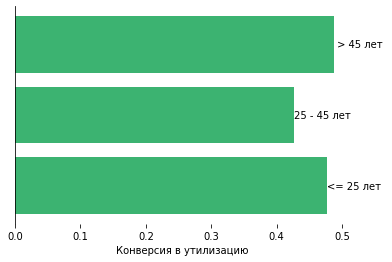

In [16]:
res = util_conversion_by_age_cat

fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set(yticks=[])
ax.set_xlabel("Конверсия в утилизацию")
b = ax.barh(res.index.astype(int), res.conversion, color = "mediumseagreen")

plt.bar_label(b, ["<= 25 лет ","25 - 45 лет "," > 45 лет "])
plt.show()

**Вывод:**

Конверсия по возрастным группам разнится в пределах 5 процентных пунктов